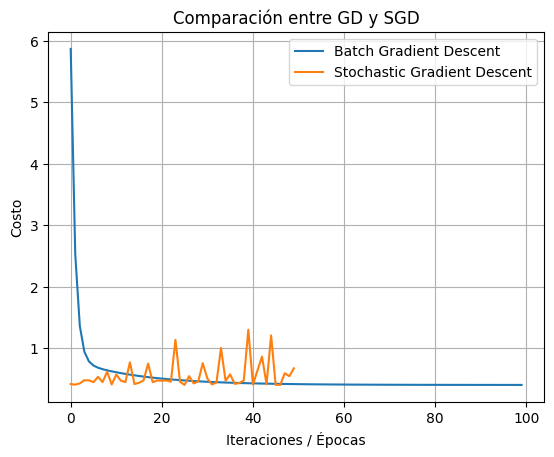

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos simulados
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Función para calcular el costo
def compute_cost(theta, X_b, y):
    m = len(y)
    return (1/(2*m)) * np.sum((X_b.dot(theta) - y)**2)

# Gradiente descendente estándar (batch)
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=100):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]  # Añadir columna de 1s
    theta = np.random.randn(2, 1)  # Inicialización aleatoria
    cost_history = []

    for _ in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(theta, X_b, y))

    return theta, cost_history

# Gradiente descendente estocástico (SGD)
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_epochs=50):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(2, 1)
    cost_history = []

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(theta, X_b, y))

    return theta, cost_history

# Ejecutar ambos métodos
theta_batch, cost_batch = batch_gradient_descent(X, y)
theta_sgd, cost_sgd = stochastic_gradient_descent(X, y)

# Visualización
plt.plot(cost_batch, label='Batch Gradient Descent')
plt.plot(cost_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Iteraciones / Épocas')
plt.ylabel('Costo')
plt.title('Comparación entre GD y SGD')
plt.legend()
plt.grid(True)
plt.show()


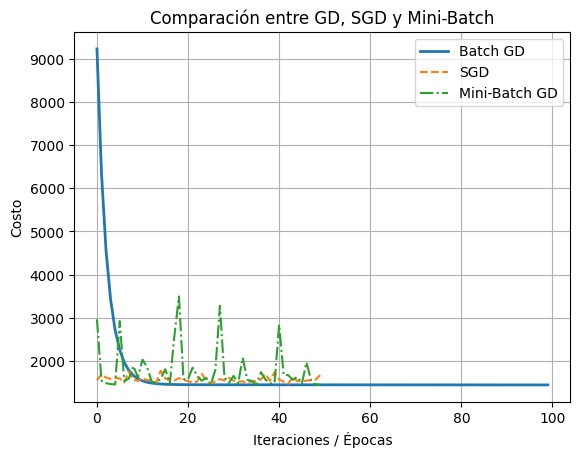

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Cargar y preparar datos
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1, 1)

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Añadir columna de unos para el término independiente
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Cálculo del costo
def compute_cost(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)

# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=100):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    cost_history = []

    for _ in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))

    return theta, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=50):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    cost_history = []

    for epoch in range(n_epochs):
        for i in range(m):
            rand_i = np.random.randint(m)
            xi = X[rand_i:rand_i+1]
            yi = y[rand_i:rand_i+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))

    return theta, cost_history

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.05, n_epochs=50, batch_size=32):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    cost_history = []

    for epoch in range(n_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

        cost_history.append(compute_cost(theta, X, y))

    return theta, cost_history

# Ejecutar los 3 métodos
theta_batch, cost_batch = batch_gradient_descent(X_train, y_train)
theta_sgd, cost_sgd = stochastic_gradient_descent(X_train, y_train)
theta_mini, cost_mini = mini_batch_gradient_descent(X_train, y_train)

# Visualización
plt.plot(cost_batch, label="Batch GD", linewidth=2)
plt.plot(cost_sgd, label="SGD", linestyle="--")
plt.plot(cost_mini, label="Mini-Batch GD", linestyle="-.")
plt.xlabel("Iteraciones / Épocas")
plt.ylabel("Costo")
plt.title("Comparación entre GD, SGD y Mini-Batch")
plt.legend()
plt.grid(True)
plt.show()


Batch GD - MSE: 2895.3010, R²: 0.4535
SGD - MSE: 2966.1165, R²: 0.4402
Mini-Batch GD - MSE: 2826.6988, R²: 0.4665


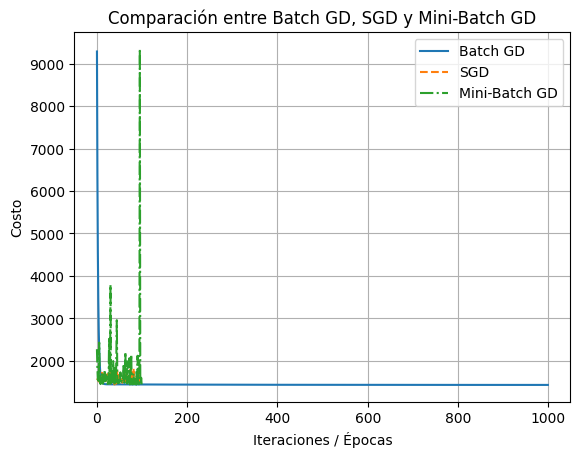

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset de diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1, 1)

# Normalizar las características (es importante para el gradiente descendente)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Añadir una columna de unos para el término independiente (bias)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

def compute_cost(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)

def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)  # Inicialización aleatoria
    cost_history = []

    for _ in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))

    return theta, cost_history
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=50):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)  # Inicialización aleatoria
    cost_history = []

    for epoch in range(n_epochs):
        for i in range(m):
            rand_i = np.random.randint(m)
            xi = X[rand_i:rand_i+1]
            yi = y[rand_i:rand_i+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))

    return theta, cost_history
def mini_batch_gradient_descent(X, y, learning_rate=0.05, n_epochs=50, batch_size=32):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)  # Inicialización aleatoria
    cost_history = []

    for epoch in range(n_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

        cost_history.append(compute_cost(theta, X, y))

    return theta, cost_history

# Entrenamiento de Batch Gradient Descent
theta_batch, cost_batch = batch_gradient_descent(X_train, y_train, learning_rate=0.1, n_iterations=1000)

# Entrenamiento de Stochastic Gradient Descent (SGD)
theta_sgd, cost_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate=0.01, n_epochs=100)

# Entrenamiento de Mini-Batch Gradient Descent
theta_mini, cost_mini = mini_batch_gradient_descent(X_train, y_train, learning_rate=0.05, n_epochs=100, batch_size=32)

# Predicciones de los modelos
y_pred_batch = X_test.dot(theta_batch)
y_pred_sgd = X_test.dot(theta_sgd)
y_pred_mini = X_test.dot(theta_mini)

# Calcular el MSE y R² para cada modelo
mse_batch = mean_squared_error(y_test, y_pred_batch)
r2_batch = r2_score(y_test, y_pred_batch)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

mse_mini = mean_squared_error(y_test, y_pred_mini)
r2_mini = r2_score(y_test, y_pred_mini)

# Mostrar resultados
print(f"Batch GD - MSE: {mse_batch:.4f}, R²: {r2_batch:.4f}")
print(f"SGD - MSE: {mse_sgd:.4f}, R²: {r2_sgd:.4f}")
print(f"Mini-Batch GD - MSE: {mse_mini:.4f}, R²: {r2_mini:.4f}")

plt.plot(cost_batch, label="Batch GD")
plt.plot(cost_sgd, label="SGD", linestyle="--")
plt.plot(cost_mini, label="Mini-Batch GD", linestyle="-.")
plt.xlabel("Iteraciones / Épocas")
plt.ylabel("Costo")
plt.title("Comparación entre Batch GD, SGD y Mini-Batch GD")
plt.legend()
plt.grid(True)
plt.show()
